In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
customer_data=pd.read_csv('Customers.csv')
product_data=pd.read_csv('Products.csv')
transaction_data=pd.read_csv("Transactions - Transactions.csv")

exploring the features of each dataset

In [3]:
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
product_data.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
product_data_=product_data
product_data_=product_data_.set_index('ProductID')
product_data_.head()

,ProductName,Category,Price
ProductID,,,
P001,ActiveWear Biography,Books,169.30
P002,ActiveWear Smartwatch,Electronics,346.30
P003,ComfortLiving Biography,Books,44.12
P004,BookWorld Rug,Home Decor,95.69
P005,TechPro T-Shirt,Clothing,429.31


In [6]:
category_product_map=dict(product_data.groupby('Category')['ProductID'].apply(set))
print(category_product_map)

{'Books': {'P001', 'P063', 'P049', 'P099', 'P043', 'P007', 'P003', 'P030', 'P048', 'P040', 'P097', 'P062', 'P054', 'P024', 'P055', 'P066', 'P017', 'P090', 'P032', 'P069', 'P068', 'P075', 'P018', 'P058', 'P085', 'P086'}, 'Clothing': {'P014', 'P065', 'P045', 'P064', 'P019', 'P092', 'P005', 'P036', 'P034', 'P044', 'P059', 'P070', 'P071', 'P016', 'P052', 'P033', 'P035', 'P060', 'P046', 'P020', 'P081', 'P076', 'P087', 'P080', 'P100'}, 'Electronics': {'P013', 'P012', 'P089', 'P073', 'P015', 'P008', 'P096', 'P083', 'P026', 'P088', 'P072', 'P031', 'P056', 'P077', 'P027', 'P002', 'P037', 'P057', 'P041', 'P042', 'P050', 'P010', 'P067', 'P098', 'P029', 'P039'}, 'Home Decor': {'P078', 'P051', 'P094', 'P074', 'P079', 'P021', 'P025', 'P053', 'P082', 'P011', 'P093', 'P006', 'P009', 'P084', 'P091', 'P023', 'P047', 'P004', 'P022', 'P095', 'P061', 'P038', 'P028'}}


In [7]:
region_customer_map=dict(customer_data.groupby('Region')['CustomerID'].apply(set)) 

In [8]:
transaction_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
transaction_data['category'] = transaction_data['ProductID'].apply(
	lambda x: next((y for y in category_product_map if x in category_product_map[y]), None)
)


In [10]:
transaction_data['region']=transaction_data['CustomerID'].apply(
    lambda x: next((y for y in region_customer_map if x in region_customer_map[y]),None)
)

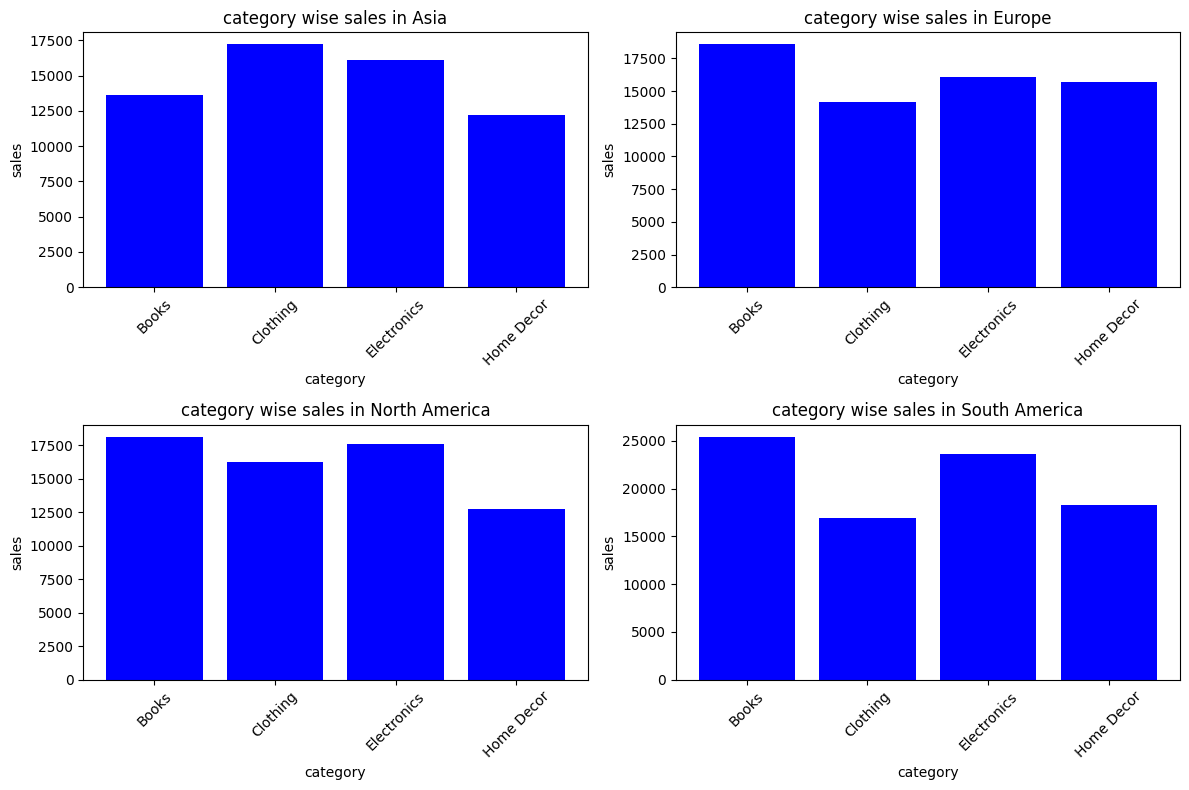

In [11]:
cate_region_sales = {
    region: group.groupby('category')['Price'].sum()
    for region, group in transaction_data.groupby('region')
}
fig,axes=plt.subplots(2,2,figsize=(12,8))
axes=axes.flatten()

for i,(region,sales_data) in enumerate(cate_region_sales.items()):
    ax=axes[i]
    ax.bar(sales_data.index,sales_data.values,color='blue')
    ax.set_title(f'category wise sales in {region}')
    ax.set_xlabel('category')
    ax.set_ylabel('sales')
    ax.set_xticks(range(len(sales_data.index)))
    ax.set_xticklabels(sales_data.index,rotation=45)


for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
len(product_data),len(customer_data),len(transaction_data)

(100, 200, 1000)

missing values and fix

In [13]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [14]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [15]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   category         1000 non-null   object 
 8   region           1000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


observation : there is no missing or null values, the datasets given has already cleaned

In [16]:
transaction_data['TransactionDate']=transaction_data['TransactionDate'].apply(lambda x: pd.to_datetime(x))

In [17]:
data = transaction_data.groupby('ProductID').size().reset_index(name='count')
data.head()

,ProductID,count
0,P001,8
1,P002,8
2,P003,12
3,P004,7
4,P005,8


In [18]:
data=data.sort_values(by='count',ascending=False)

In [19]:
data.head()

,ProductID,count
58,P059,19
28,P029,17
61,P062,16
78,P079,16
53,P054,16


In [20]:
data1 = pd.merge(data, product_data, on='ProductID', how='inner') 
data1.head()

,ProductID,count,ProductName,Category,Price
0,P059,19,SoundWave Jeans,Clothing,303.20
1,P029,17,TechPro Headphones,Electronics,433.64
2,P062,16,HomeSense Novel,Books,374.16
3,P079,16,ActiveWear Rug,Home Decor,417.37
4,P054,16,SoundWave Cookbook,Books,57.30


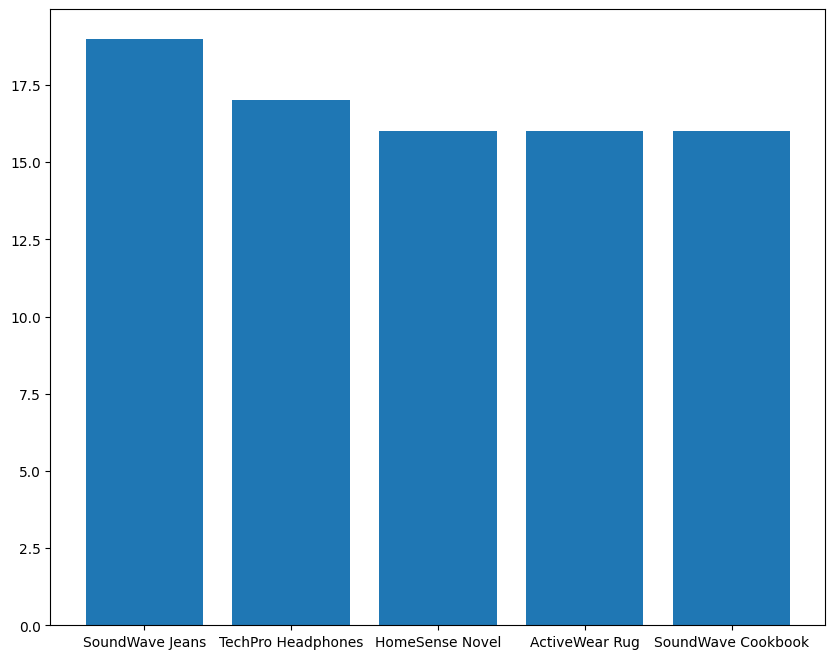

In [21]:
plt.figure(figsize=(10,8))
plt.bar(data1[:5]['ProductName'],data1[:5]['count'])
plt.show()  

In [22]:
customer_aggregation = transaction_data.groupby('CustomerID')['ProductID'].apply(list).reset_index(name='Products')
customer_aggregation.head()
customer_aggregation_trans=transaction_data.groupby('CustomerID')['TransactionID'].apply(list).reset_index(name='Transactions')
customer_aggregation_trans.head()
customer_aggregation_count=transaction_data.groupby('CustomerID')['Quantity'].apply(list).reset_index(name='Quantity')
# customer_aggregation_trans.head()
cust=pd.merge(customer_aggregation,customer_aggregation_trans,on='CustomerID')
cust=pd.merge(cust,customer_aggregation_count,on='CustomerID')
cust.head()

,CustomerID,Products,Transactions,Quantity
0,C0001,"[P054, P022, P096, P083, P029]","[T00015, T00932, T00085, T00445, T00436]","[2, 3, 2, 2, 3]"
1,C0002,"[P095, P004, P019, P071]","[T00155, T00129, T00148, T00675]","[2, 4, 2, 2]"
2,C0003,"[P025, P006, P035, P002]","[T00462, T00143, T00812, T00648]","[3, 3, 4, 4]"
3,C0004,"[P049, P053, P038, P025, P097, P024, P008, P077]","[T00004, T00744, T00251, T00456, T00534, T0084...","[4, 4, 3, 2, 3, 1, 2, 4]"
4,C0005,"[P025, P039, P012]","[T00331, T00348, T00789]","[3, 2, 2]"


In [23]:
cust = (
    transaction_data.groupby('CustomerID')
    .agg({
        'ProductID': list,
        'TransactionID': list,
        'Quantity':list
    })
    .reset_index()
    .rename(columns={'ProductID': 'Products', 'TransactionID': 'Transactions','Quantity':'Quantity'})
)
cust.head()


,CustomerID,Products,Transactions,Quantity
0,C0001,"[P054, P022, P096, P083, P029]","[T00015, T00932, T00085, T00445, T00436]","[2, 3, 2, 2, 3]"
1,C0002,"[P095, P004, P019, P071]","[T00155, T00129, T00148, T00675]","[2, 4, 2, 2]"
2,C0003,"[P025, P006, P035, P002]","[T00462, T00143, T00812, T00648]","[3, 3, 4, 4]"
3,C0004,"[P049, P053, P038, P025, P097, P024, P008, P077]","[T00004, T00744, T00251, T00456, T00534, T0084...","[4, 4, 3, 2, 3, 1, 2, 4]"
4,C0005,"[P025, P039, P012]","[T00331, T00348, T00789]","[3, 2, 2]"


In [24]:
cust['NoOfTransactions']=cust['Transactions'].apply(lambda x:len(x))
cust.head()

,CustomerID,Products,Transactions,Quantity,NoOfTransactions
0,C0001,"[P054, P022, P096, P083, P029]","[T00015, T00932, T00085, T00445, T00436]","[2, 3, 2, 2, 3]",5
1,C0002,"[P095, P004, P019, P071]","[T00155, T00129, T00148, T00675]","[2, 4, 2, 2]",4
2,C0003,"[P025, P006, P035, P002]","[T00462, T00143, T00812, T00648]","[3, 3, 4, 4]",4
3,C0004,"[P049, P053, P038, P025, P097, P024, P008, P077]","[T00004, T00744, T00251, T00456, T00534, T0084...","[4, 4, 3, 2, 3, 1, 2, 4]",8
4,C0005,"[P025, P039, P012]","[T00331, T00348, T00789]","[3, 2, 2]",3


In [25]:
cust['category']=cust['Products'].apply(lambda x:[product_data_['Category'][i] for i in x])

In [26]:
cust['products']=cust['Products'].apply(lambda x:[product_data_['ProductName'][i] for i in x])

In [27]:
cust.head()

,CustomerID,Products,Transactions,Quantity,NoOfTransactions,category,products
0,C0001,"[P054, P022, P096, P083, P029]","[T00015, T00932, T00085, T00445, T00436]","[2, 3, 2, 2, 3]",5,"[Books, Home Decor, Electronics, Electronics, ...","[SoundWave Cookbook, HomeSense Wall Art, Sound..."
1,C0002,"[P095, P004, P019, P071]","[T00155, T00129, T00148, T00675]","[2, 4, 2, 2]",4,"[Home Decor, Home Decor, Clothing, Clothing]","[BookWorld Cookware Set, BookWorld Rug, Comfor..."
2,C0003,"[P025, P006, P035, P002]","[T00462, T00143, T00812, T00648]","[3, 3, 4, 4]",4,"[Home Decor, Home Decor, Clothing, Electronics]","[ActiveWear Cookware Set, ActiveWear Rug, Acti..."
3,C0004,"[P049, P053, P038, P025, P097, P024, P008, P077]","[T00004, T00744, T00251, T00456, T00534, T0084...","[4, 4, 3, 2, 3, 1, 2, 4]",8,"[Books, Home Decor, Home Decor, Home Decor, Bo...","[TechPro Textbook, TechPro Rug, TechPro Vase, ..."
4,C0005,"[P025, P039, P012]","[T00331, T00348, T00789]","[3, 2, 2]",3,"[Home Decor, Electronics, Electronics]","[ActiveWear Cookware Set, TechPro Smartwatch, ..."


In [28]:
cust.sort_values(by='NoOfTransactions',ascending=False,inplace=True)
cust.head()

,CustomerID,Products,Transactions,Quantity,NoOfTransactions,category,products
155,C0156,"[P062, P054, P007, P058, P050, P100, P059, P05...","[T00190, T00699, T00565, T00824, T00984, T0074...","[2, 3, 2, 1, 4, 4, 1, 3, 4, 1, 3]",11,"[Books, Books, Books, Books, Electronics, Clot...","[HomeSense Novel, SoundWave Cookbook, SoundWav..."
108,C0109,"[P034, P095, P038, P003, P100, P100, P089, P05...","[T00093, T00961, T00032, T00381, T00283, T0030...","[4, 3, 4, 4, 4, 2, 2, 3, 1, 2, 3]",11,"[Clothing, Home Decor, Home Decor, Books, Clot...","[HomeSense T-Shirt, BookWorld Cookware Set, Te..."
174,C0175,"[P051, P047, P076, P059, P048, P063, P066, P06...","[T00607, T00107, T00709, T00400, T00280, T0037...","[4, 3, 1, 2, 2, 3, 1, 4, 2, 4]",10,"[Home Decor, Home Decor, Clothing, Clothing, B...","[ComfortLiving Desk Lamp, ComfortLiving Cookwa..."
140,C0141,"[P062, P092, P036, P025, P042, P048, P065, P09...","[T00041, T00439, T00316, T00580, T00861, T0081...","[4, 4, 2, 1, 4, 4, 3, 1, 1, 3]",10,"[Books, Clothing, Clothing, Home Decor, Electr...","[HomeSense Novel, BookWorld Running Shoes, Boo..."
64,C0065,"[P049, P053, P038, P061, P022, P032, P029, P08...","[T00237, T00568, T00432, T00696, T00160, T0049...","[2, 1, 3, 3, 3, 4, 4, 3, 3, 1]",10,"[Books, Home Decor, Home Decor, Home Decor, Ho...","[TechPro Textbook, TechPro Rug, TechPro Vase, ..."


In [29]:
cust=pd.merge(cust,customer_data,on='CustomerID',how='inner')
cust.head()

,CustomerID,Products,Transactions,Quantity,NoOfTransactions,category,products,CustomerName,Region,SignupDate
0,C0156,"[P062, P054, P007, P058, P050, P100, P059, P05...","[T00190, T00699, T00565, T00824, T00984, T0074...","[2, 3, 2, 1, 4, 4, 1, 3, 4, 1, 3]",11,"[Books, Books, Books, Books, Electronics, Clot...","[HomeSense Novel, SoundWave Cookbook, SoundWav...",William Adams,North America,2023-08-19
1,C0109,"[P034, P095, P038, P003, P100, P100, P089, P05...","[T00093, T00961, T00032, T00381, T00283, T0030...","[4, 3, 4, 4, 4, 2, 2, 3, 1, 2, 3]",11,"[Clothing, Home Decor, Home Decor, Books, Clot...","[HomeSense T-Shirt, BookWorld Cookware Set, Te...",Abigail Jones,North America,2022-05-09
2,C0175,"[P051, P047, P076, P059, P048, P063, P066, P06...","[T00607, T00107, T00709, T00400, T00280, T0037...","[4, 3, 1, 2, 2, 3, 1, 4, 2, 4]",10,"[Home Decor, Home Decor, Clothing, Clothing, B...","[ComfortLiving Desk Lamp, ComfortLiving Cookwa...",Matthew Johnson,Asia,2022-04-16
3,C0141,"[P062, P092, P036, P025, P042, P048, P065, P09...","[T00041, T00439, T00316, T00580, T00861, T0081...","[4, 4, 2, 1, 4, 4, 3, 1, 1, 3]",10,"[Books, Clothing, Clothing, Home Decor, Electr...","[HomeSense Novel, BookWorld Running Shoes, Boo...",Paul Parsons,Europe,2023-02-23
4,C0065,"[P049, P053, P038, P061, P022, P032, P029, P08...","[T00237, T00568, T00432, T00696, T00160, T0049...","[2, 1, 3, 3, 3, 4, 4, 3, 3, 1]",10,"[Books, Home Decor, Home Decor, Home Decor, Ho...","[TechPro Textbook, TechPro Rug, TechPro Vase, ...",Gerald Hines,North America,2024-07-10


In [30]:
transaction_data_=transaction_data
transaction_data_.set_index('TransactionID',inplace=True)

In [31]:
cust['amount'] = cust['Transactions'].apply(lambda x: sum([int(transaction_data_['Price'][i]) for i in x]))

In [32]:
cust.head()

,CustomerID,Products,Transactions,Quantity,NoOfTransactions,category,products,CustomerName,Region,SignupDate,amount
0,C0156,"[P062, P054, P007, P058, P050, P100, P059, P05...","[T00190, T00699, T00565, T00824, T00984, T0074...","[2, 3, 2, 1, 4, 4, 1, 3, 4, 1, 3]",11,"[Books, Books, Books, Books, Electronics, Clot...","[HomeSense Novel, SoundWave Cookbook, SoundWav...",William Adams,North America,2023-08-19,3175
1,C0109,"[P034, P095, P038, P003, P100, P100, P089, P05...","[T00093, T00961, T00032, T00381, T00283, T0030...","[4, 3, 4, 4, 4, 2, 2, 3, 1, 2, 3]",11,"[Clothing, Home Decor, Home Decor, Books, Clot...","[HomeSense T-Shirt, BookWorld Cookware Set, Te...",Abigail Jones,North America,2022-05-09,2180
2,C0175,"[P051, P047, P076, P059, P048, P063, P066, P06...","[T00607, T00107, T00709, T00400, T00280, T0037...","[4, 3, 1, 2, 2, 3, 1, 4, 2, 4]",10,"[Home Decor, Home Decor, Clothing, Clothing, B...","[ComfortLiving Desk Lamp, ComfortLiving Cookwa...",Matthew Johnson,Asia,2022-04-16,2605
3,C0141,"[P062, P092, P036, P025, P042, P048, P065, P09...","[T00041, T00439, T00316, T00580, T00861, T0081...","[4, 4, 2, 1, 4, 4, 3, 1, 1, 3]",10,"[Books, Clothing, Clothing, Home Decor, Electr...","[HomeSense Novel, BookWorld Running Shoes, Boo...",Paul Parsons,Europe,2023-02-23,3852
4,C0065,"[P049, P053, P038, P061, P022, P032, P029, P08...","[T00237, T00568, T00432, T00696, T00160, T0049...","[2, 1, 3, 3, 3, 4, 4, 3, 3, 1]",10,"[Books, Home Decor, Home Decor, Home Decor, Ho...","[TechPro Textbook, TechPro Rug, TechPro Vase, ...",Gerald Hines,North America,2024-07-10,2751


In [33]:
cust['category'] = cust['category'].apply(lambda x: {i: x.count(i) for i in x})
cust['products']=cust['products'].apply(lambda x:{i:x.count(i) for i in x})
cust['Quantity']=cust['Quantity'].apply(lambda x:{i:x.count(i) for i in x} )
cust.head()

,CustomerID,Products,Transactions,Quantity,NoOfTransactions,category,products,CustomerName,Region,SignupDate,amount
0,C0156,"[P062, P054, P007, P058, P050, P100, P059, P05...","[T00190, T00699, T00565, T00824, T00984, T0074...","{2: 2, 3: 3, 1: 3, 4: 3}",11,"{'Books': 4, 'Electronics': 3, 'Clothing': 4}","{'HomeSense Novel': 1, 'SoundWave Cookbook': 2...",William Adams,North America,2023-08-19,3175
1,C0109,"[P034, P095, P038, P003, P100, P100, P089, P05...","[T00093, T00961, T00032, T00381, T00283, T0030...","{4: 4, 3: 3, 2: 3, 1: 1}",11,"{'Clothing': 5, 'Home Decor': 2, 'Books': 2, '...","{'HomeSense T-Shirt': 1, 'BookWorld Cookware S...",Abigail Jones,North America,2022-05-09,2180
2,C0175,"[P051, P047, P076, P059, P048, P063, P066, P06...","[T00607, T00107, T00709, T00400, T00280, T0037...","{4: 3, 3: 2, 1: 2, 2: 3}",10,"{'Home Decor': 2, 'Clothing': 3, 'Books': 3, '...","{'ComfortLiving Desk Lamp': 1, 'ComfortLiving ...",Matthew Johnson,Asia,2022-04-16,2605
3,C0141,"[P062, P092, P036, P025, P042, P048, P065, P09...","[T00041, T00439, T00316, T00580, T00861, T0081...","{4: 4, 2: 1, 1: 3, 3: 2}",10,"{'Books': 2, 'Clothing': 4, 'Home Decor': 2, '...","{'HomeSense Novel': 1, 'BookWorld Running Shoe...",Paul Parsons,Europe,2023-02-23,3852
4,C0065,"[P049, P053, P038, P061, P022, P032, P029, P08...","[T00237, T00568, T00432, T00696, T00160, T0049...","{2: 1, 1: 2, 3: 5, 4: 2}",10,"{'Books': 3, 'Home Decor': 6, 'Electronics': 1}","{'TechPro Textbook': 2, 'TechPro Rug': 1, 'Tec...",Gerald Hines,North America,2024-07-10,2751


In [34]:
cust.drop(['Products','Transactions','CustomerName'],axis=1,inplace=True)
cust.head()

,CustomerID,Quantity,NoOfTransactions,category,products,Region,SignupDate,amount
0,C0156,"{2: 2, 3: 3, 1: 3, 4: 3}",11,"{'Books': 4, 'Electronics': 3, 'Clothing': 4}","{'HomeSense Novel': 1, 'SoundWave Cookbook': 2...",North America,2023-08-19,3175
1,C0109,"{4: 4, 3: 3, 2: 3, 1: 1}",11,"{'Clothing': 5, 'Home Decor': 2, 'Books': 2, '...","{'HomeSense T-Shirt': 1, 'BookWorld Cookware S...",North America,2022-05-09,2180
2,C0175,"{4: 3, 3: 2, 1: 2, 2: 3}",10,"{'Home Decor': 2, 'Clothing': 3, 'Books': 3, '...","{'ComfortLiving Desk Lamp': 1, 'ComfortLiving ...",Asia,2022-04-16,2605
3,C0141,"{4: 4, 2: 1, 1: 3, 3: 2}",10,"{'Books': 2, 'Clothing': 4, 'Home Decor': 2, '...","{'HomeSense Novel': 1, 'BookWorld Running Shoe...",Europe,2023-02-23,3852
4,C0065,"{2: 1, 1: 2, 3: 5, 4: 2}",10,"{'Books': 3, 'Home Decor': 6, 'Electronics': 1}","{'TechPro Textbook': 2, 'TechPro Rug': 1, 'Tec...",North America,2024-07-10,2751


In [35]:
import math
cust['AvgAmountPerTransaction'] = cust['amount'] / cust['NoOfTransactions']
cust['AvgQuantityPerTransaction']=cust['Quantity'].apply(lambda x:math.floor(sum([a*b for a,b in x.items()]) /sum(x.values())))
cust['FavouriteCategory'] = cust['category'].apply(
    lambda x: max(x.items(), key=lambda item: item[1])[0]
)
cust['FavouriteProduct'] = cust['products'].apply(
    lambda x: max(x.items(), key=lambda item: item[1])[0]
)
# cust.drop(['Quantity','category','products'],axis=1,inplace=True)
cust.head()

,CustomerID,Quantity,NoOfTransactions,category,products,Region,SignupDate,amount,AvgAmountPerTransaction,AvgQuantityPerTransaction,FavouriteCategory,FavouriteProduct
0,C0156,"{2: 2, 3: 3, 1: 3, 4: 3}",11,"{'Books': 4, 'Electronics': 3, 'Clothing': 4}","{'HomeSense Novel': 1, 'SoundWave Cookbook': 2...",North America,2023-08-19,3175,288.636364,2,Books,SoundWave Cookbook
1,C0109,"{4: 4, 3: 3, 2: 3, 1: 1}",11,"{'Clothing': 5, 'Home Decor': 2, 'Books': 2, '...","{'HomeSense T-Shirt': 1, 'BookWorld Cookware S...",North America,2022-05-09,2180,198.181818,2,Clothing,HomeSense Sweater
2,C0175,"{4: 3, 3: 2, 1: 2, 2: 3}",10,"{'Home Decor': 2, 'Clothing': 3, 'Books': 3, '...","{'ComfortLiving Desk Lamp': 1, 'ComfortLiving ...",Asia,2022-04-16,2605,260.500000,2,Clothing,ComfortLiving Desk Lamp
3,C0141,"{4: 4, 2: 1, 1: 3, 3: 2}",10,"{'Books': 2, 'Clothing': 4, 'Home Decor': 2, '...","{'HomeSense Novel': 1, 'BookWorld Running Shoe...",Europe,2023-02-23,3852,385.200000,2,Clothing,HomeSense Novel
4,C0065,"{2: 1, 1: 2, 3: 5, 4: 2}",10,"{'Books': 3, 'Home Decor': 6, 'Electronics': 1}","{'TechPro Textbook': 2, 'TechPro Rug': 1, 'Tec...",North America,2024-07-10,2751,275.100000,2,Home Decor,TechPro Textbook


In [36]:
avg_transactions = cust['NoOfTransactions'].mean()
max_transactions = cust['NoOfTransactions'].max()
avg_amount,max_amount,min_amount=cust['amount'].mean(),cust['amount'].max(),cust['amount'].min()
print(f"Average Transactions: {avg_transactions}, Max Transactions: {max_transactions}")
print(f'average {int(avg_amount)}, max {max_amount}, min {min_amount}')


Average Transactions: 5.025125628140704, Max Transactions: 11
average 1367, max 3852, min 41


In [37]:
region_wise_amount = dict(cust.groupby('Region')['amount'].sum())
region_wise_amount


{'Asia': 59036,
 'Europe': 64365,
 'North America': 64602,
 'South America': 84064}

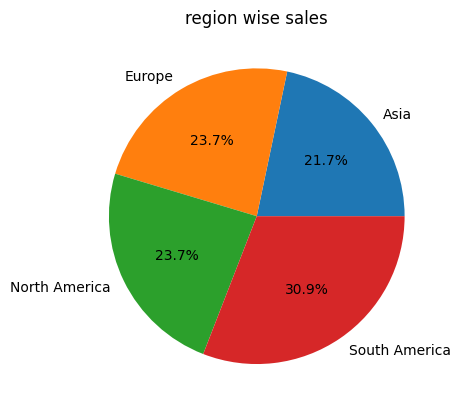

In [38]:
plt.pie(region_wise_amount.values(), labels=region_wise_amount.keys(), autopct='%1.1f%%')
plt.title("region wise sales")
plt.show()

In [39]:
region_wise_customer_count=dict(cust.groupby('Region')['CustomerID'].count())
print(region_wise_customer_count)

{'Asia': 44, 'Europe': 50, 'North America': 46, 'South America': 59}


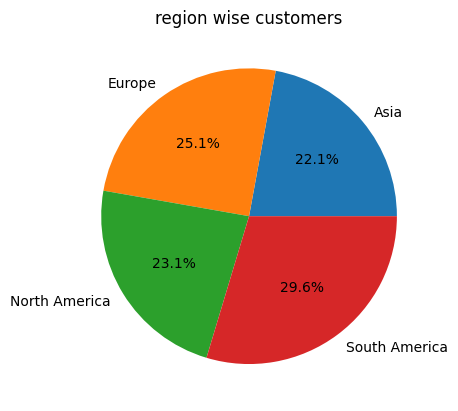

In [40]:
plt.pie(region_wise_customer_count.values(), labels=region_wise_customer_count.keys(), autopct='%1.1f%%')
plt.title('region wise customers')
plt.show()

In [41]:
product_data['Category'].unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

In [42]:
category_wize_sales=dict(transaction_data.groupby('category')['TotalValue'].apply(sum))
category_wize_sales


C:\Users\Vasantha Raj\AppData\Local\Temp\ipykernel_9920\2307501563.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  category_wize_sales=dict(transaction_data.groupby('category')['TotalValue'].apply(sum))


{'Books': 192147.47000000003,
 'Clothing': 166170.66,
 'Electronics': 180783.5,
 'Home Decor': 150893.93}

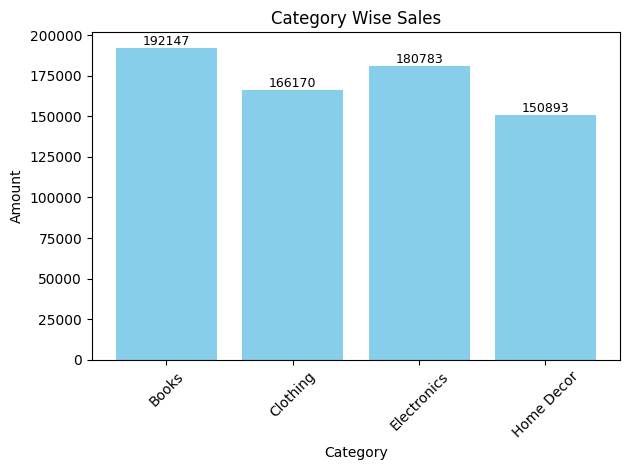

In [43]:
plt.bar(category_wize_sales.keys(), category_wize_sales.values(), color='skyblue')
plt.title('Category Wise Sales')
plt.xlabel('Category')
plt.ylabel('Amount')
for i, value in enumerate(category_wize_sales.values()):
    plt.text(i, value + 10,  
             str(int(value)),     
             ha='center',   
             va='bottom',    
             fontsize=9)    

plt.xticks(rotation=45) 
plt.tight_layout()       
plt.show()


In [44]:
cust.head()

,CustomerID,Quantity,NoOfTransactions,category,products,Region,SignupDate,amount,AvgAmountPerTransaction,AvgQuantityPerTransaction,FavouriteCategory,FavouriteProduct
0,C0156,"{2: 2, 3: 3, 1: 3, 4: 3}",11,"{'Books': 4, 'Electronics': 3, 'Clothing': 4}","{'HomeSense Novel': 1, 'SoundWave Cookbook': 2...",North America,2023-08-19,3175,288.636364,2,Books,SoundWave Cookbook
1,C0109,"{4: 4, 3: 3, 2: 3, 1: 1}",11,"{'Clothing': 5, 'Home Decor': 2, 'Books': 2, '...","{'HomeSense T-Shirt': 1, 'BookWorld Cookware S...",North America,2022-05-09,2180,198.181818,2,Clothing,HomeSense Sweater
2,C0175,"{4: 3, 3: 2, 1: 2, 2: 3}",10,"{'Home Decor': 2, 'Clothing': 3, 'Books': 3, '...","{'ComfortLiving Desk Lamp': 1, 'ComfortLiving ...",Asia,2022-04-16,2605,260.500000,2,Clothing,ComfortLiving Desk Lamp
3,C0141,"{4: 4, 2: 1, 1: 3, 3: 2}",10,"{'Books': 2, 'Clothing': 4, 'Home Decor': 2, '...","{'HomeSense Novel': 1, 'BookWorld Running Shoe...",Europe,2023-02-23,3852,385.200000,2,Clothing,HomeSense Novel
4,C0065,"{2: 1, 1: 2, 3: 5, 4: 2}",10,"{'Books': 3, 'Home Decor': 6, 'Electronics': 1}","{'TechPro Textbook': 2, 'TechPro Rug': 1, 'Tec...",North America,2024-07-10,2751,275.100000,2,Home Decor,TechPro Textbook


In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_similarity(cust1, cust2, cust_data):
    # Get customer details
    try:
        customer1 = cust_data[cust_data['CustomerID'] == cust1].iloc[0].to_dict()
        customer2 = cust_data[cust_data['CustomerID'] == cust2].iloc[0].to_dict()
    except IndexError:
        raise ValueError("Invalid Customer IDs provided.")

    # Get all categories for fixed-length vectors
    all_categories = list(set().union(*cust_data['category'].apply(lambda x: x.keys())))
    category1 = np.array([customer1['category'].get(cat, 0) for cat in all_categories])
    category2 = np.array([customer2['category'].get(cat, 0) for cat in all_categories])

    # print(category1,category2)

    # Calculate category similarity using cosine similarity
    category_similarity = cosine_similarity([category1], [category2])[0][0]

    # # Product similarity (Jaccard similarity)
    # products1 = set(customer1['products'].keys())
    # products2 = set(customer2['products'].keys())
    # product_intersection = len(products1 & products2)
    # product_union = len(products1 | products2)
    # product_similarity = product_intersection / product_union if product_union != 0 else 0


    # Region similarity (binary match)
    region_similarity = 1 if customer1['Region'] == customer2['Region'] else 0

    # Normalize numerical fields
    noot_diff = abs(customer1['NoOfTransactions'] - customer2['NoOfTransactions'])
    avg_trans_diff = abs(customer1['AvgAmountPerTransaction'] - customer2['AvgAmountPerTransaction'])
    avg_qty_diff = abs(customer1['AvgQuantityPerTransaction'] - customer2['AvgQuantityPerTransaction'])

    # Normalize differences to a scale of 0 to 1
    max_noot = cust_data['NoOfTransactions'].max()
    max_avg_trans = cust_data['AvgAmountPerTransaction'].max()
    max_avg_qty = cust_data['AvgQuantityPerTransaction'].max()

    noot_similarity = 1 - (noot_diff / max_noot)
    avg_trans_similarity = 1 - (avg_trans_diff / max_avg_trans)
    avg_qty_similarity = 1 - (avg_qty_diff / max_avg_qty)

    weights = {
        'category': 0.3,
        # 'product': 0.1,
        'region': 0.1,
        'noot': 0.2,
        'avg_trans': 0.2,
        'avg_qty': 0.2,
    }
    overall_similarity = (
        weights['category'] * category_similarity +
        # weights['product'] * product_similarity +
        weights['region'] * region_similarity +
        weights['noot'] * noot_similarity +
        weights['avg_trans'] * avg_trans_similarity +
        weights['avg_qty'] * avg_qty_similarity
    )

    return overall_similarity
similarities={}
for i in range(1,200):
    cust1=f"C{str(i).zfill(4)}"
    similarities[cust1]=[]
    for j in range(1, 200): 
        if i != j : 
            cust2 = f"C{str(j).zfill(4)}"  
            try:
                similarity_score = calculate_similarity(cust1, cust2, cust)
                if similarity_score>0.9:
                    similarities[cust1].append(cust2)
            except ValueError as e:
                continue

In [46]:
print( [i if i in similarities['C0048'] else -1 for i in similarities['C0001']])

[-1, 'C0107', -1, -1, 'C0181', 'C0190', -1, 'C0192']


In [47]:
print(similarities['C0048'])

['C0001', 'C0013', 'C0085', 'C0096', 'C0102', 'C0107', 'C0118', 'C0155', 'C0158', 'C0181', 'C0188', 'C0190', 'C0192']


c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Li

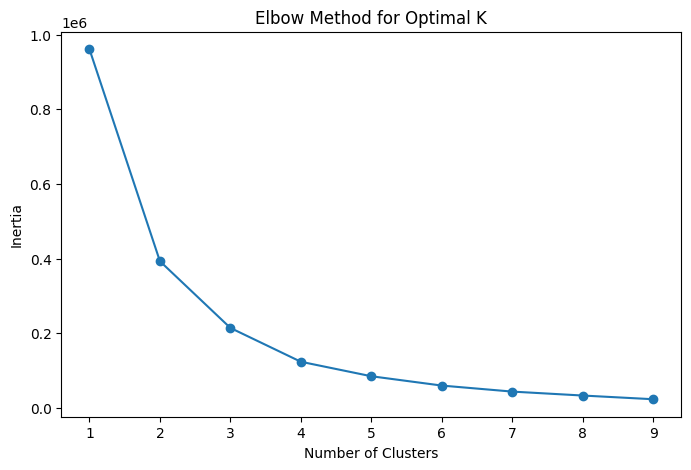

c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Vasantha Raj\AppData\Local\Temp\ipykernel_9920\1431048808.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Cluster"] = kmeans.fit_predict(features)


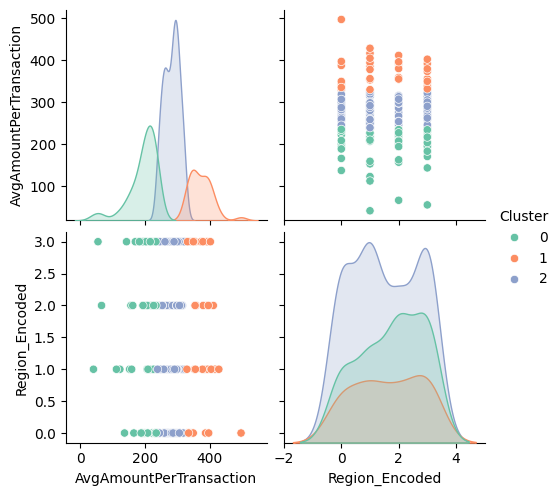

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


df = cust

# Encode Categorical Variables
df["Region_Encoded"] = df["Region"].astype("category").cat.codes
df['FavouriteCategory_encoded']=df['FavouriteCategory'].astype("category").cat.codes

# Select Features for Clustering
# features = df[[ "AvgAmountPerTransaction","AvgQuantityPerTransaction","Region_Encoded","FavouriteCategory_encoded"]]

features = df[[ "AvgAmountPerTransaction","Region_Encoded"]]
# # Normalize Features
# scaler = StandardScaler()
# normalized_features = scaler.fit_transform(features)


# Determine Optimal Clusters Using Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Perform K-Means Clustering with Optimal K (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
features["Cluster"] = kmeans.fit_predict(features)

# Visualize Clusters
sns.pairplot(features, hue="Cluster", diag_kind="kde", palette="Set2")
plt.show()


# Display Segmented Data
# print(df)



Explained Variance by each component: [0.99092199 0.00907353]
Total Explained Variance: 1.00


c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Li

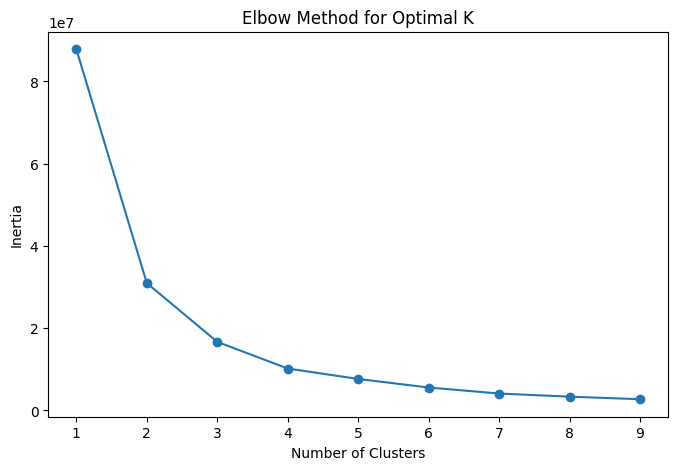

c:\Users\Vasantha Raj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


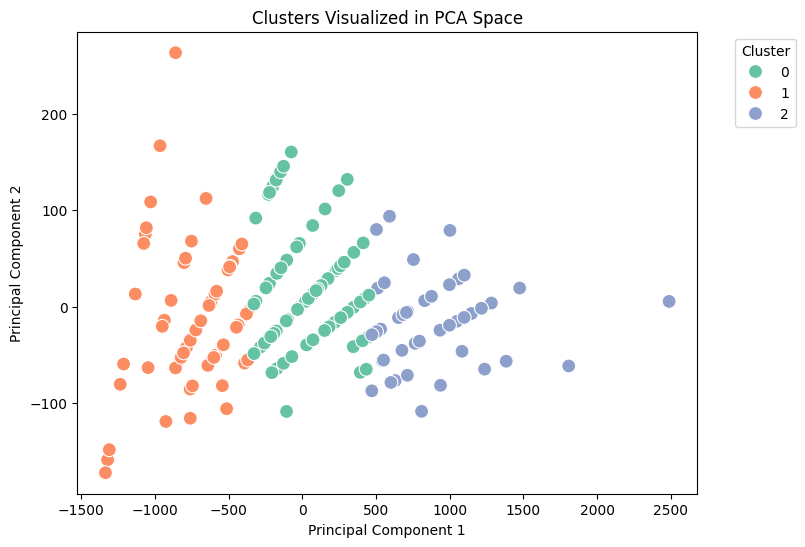

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select Features for Clustering
features = df[[ "AvgAmountPerTransaction","AvgQuantityPerTransaction","Region_Encoded","FavouriteCategory_encoded"]]

# Perform PCA to Reduce to 2 Dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Add PCA components to the DataFrame for Visualization
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance):.2f}")

# Determine Optimal Clusters Using Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Perform Clustering on PCA-Reduced Data (Using Optimal K)
optimal_k = 3  # Replace with the value determined from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_PCA'] = kmeans.fit_predict(pca_features)

# Visualize Clusters in the PCA Space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_PCA', palette='Set2', data=df, s=100)
plt.title('Clusters Visualized in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

